<a href="https://colab.research.google.com/github/RiseAboveAll/Deep_Learning_Python/blob/master/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<h2>Machine Learning</h2>

- Discovers rules to execute a data processing task.  It learns useful representations of input data which get closure to expected output.

- Search for useful representations of some input data, within a predefined space of possibilities,using guidance from a feedback signal.

- Maps inputs to targets, observing examples.


<h2>Deep Learning</h2>

- Learns representations from data that put an emphasis on leaning successive layers.

-  Deep in Deep Learning stands for successive layers of representations, i.e number of layers used to contribute to a model.

-  Layer representations are learned via neural networks, structured in layers stacked on top of each other.

-  Neural network transforms the image into representations that are increasingly different from the orignal image and informative about the final result.

-  What transformation does a layer do to its input data is stored in the layers weights, i.e transformation implemented by a layer is parameterized by its weights. Learning means finding a set of values for the weights of all layers in a network such that the network correctly maps inputs to targets.


- We need to observe how far the predicted output is from actual. This is done via loss function. Loss function calculate the distance score between the predicted and actual target variable and is termed as cost or score.

- This score is used as feedback signal to adjust the value of weights in direction which will lower the loss score. This is implemented by the optimizer.

- Initially weights assigned are random. But with every example the network process, weights are adjusted in the direction , where the loss score is minimum.

# Libraries

In [1]:
!pip3 install keras

In [6]:
from keras.datasets import mnist
from keras import models,layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


# Mathematical Building Blocks of Neural Networks

Example : Classify Greyscale images of handwritten digits (28x28) into 10 categories. 

<h3> Loading Dataset </h3>

In [7]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

<h3> Model Workflow :</h3>

- Feead neural network the training data

- Network will associate images and labels

- Network will predict

<h3> Network Architecture </h3>

In [8]:
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))


Building block of neural networks is the layer. It extracts representations out of the data fed into them .

Here, network consist of two dense layers (fully conncected network). To make network fnctional, we need to pick :

- Loss Function 

- Optimizer 

- Metrics : monitor during training an testing 

In [9]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Before training, we need to process data by reshaping it into shape which network expects and scaling them in between 0-1. 

In [10]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255.0

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255.0

Categorically encode the labels :

In [12]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

Train network :

In [13]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1026 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9883


In [15]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print(test_loss,test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9787
0.06928634643554688 0.9786999821662903


Training Acc : 98.83

Test Acc : 97.86

There lies overfitting.

# Data Representations for Neural Network

<h3> Tensor </h3>

It is a container fo data, generalization of matrices to an arbitrary number of dimensions.

Types :

- Scalars : Contain only one number. To find the number of axes use numpy ndim attribute. 

eg:

```
x=np.array(12)
x.ndim
```

- Vectors(1d Tensors)

1-D tensors have one axis.

eg:

```

x=np.array([12.,3.,6.,14])
x.ndim

```

- Matrices(2D Tensors)

An array of vectors is a matrix or 2D Tensor. It has two axes : rows and columns.

```

x=np.array([[1,2,3],
           [1,2,3],
           [1,2,3]])

x.ndim
```

- 3D Tensors:

Container having more than 2 dimensions

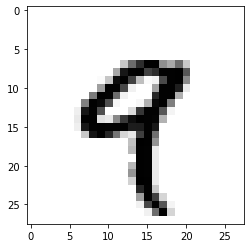

In [8]:
digit=train_images[4]
plt.imshow(digit,cmap=plt.cm.binary)

# Tensor Operations

<h3> Element wise operation :</h3>

Activation function operations are element wise operation, which are independently applied to each entry in the tensor .

<h3> Broadcasting </h3>

While adding tensors of different shapes, the smaller tensor will be broadcasted to match the shape of larger tensor.

It consist of two steps:

- Axes are added to the smaller tensor to match the ndim of large tensor

- Smaller tensor is repeated along the new axes to match the shape of large tensor

<h3> Tensor Dot </h3>

Dot product between two matrix is a scalar value.

You can take dot product if x.shape[1]==y.shape[0], result will be of shape (x.shape[0],y.shape[1])

<h3> Tensor Reshaping </h3>

Re-arranging rows and columns to match a target shape

# Gradient Based Optimization

- Neural layer have two attributes tensors : weights(w) and biases(b), which are trainable parameters.These weights contains information learned by the network from exposure to training data.

- Initially weight matrices are randomly initiallized by small random values. Objective is to adjust these weights as per the feedback signal i.e loss .

<h3> Training Loop Steps: </3>

  - Take a batch of training samples x and corresponding targets y

  - Run the network on x (forward pass) to obtain predictions y_pred

  - Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y

  - Update all weights of the network in a way that slightly reduces the loss on this batch.

All mathematical operation being used in network are differentiable and compute the gradient of the loss with regard to the networks cofficients, we can move the coefficients in the opposite direcion from the gradient.

<h3> Derivative </h3>

Consider f(x)=y, mapping real number x to a new real number y. Because the function is continuous, a small change in x can only result in a small change in y. If we increase x by small amount let say ex, it resullts in small ey change to y.

f(x+ex)=y+ey

When ex is small enough, around a certain point , it is possible to approximate f as a linear function of slope a , so that ey becomes a*ex.

f(x+ex)=y+a*ex

a is called derivative of f in p. If a is negative, it means a small change of x around p will decrease f(x) , if a is positive, a small change in x will increase f(x). Absolute value of a tells us how quickly this increase or decrease will happen.

<h3> Derivative of a Tensor Operation </h3>

Consider : Input Vector -> X , Coefficient/Weight Matrix -> W , Target -> y, Loss Function -> loss. Using W,X we can compute y_pred and compute loss :

y_pred =dot(W,X)
loss_value=loss(y,y_pred)

If we freeze X and y, then we can interpret as a function mapping values of W to loss_value

loss_value=f(W)

Let us say the current value of W is W0,then the derivative of f in the point W0 is a tensor gradient(f)(W0) with the same shape as W, where each coefficient gradient (f) (W0)[i.j] indicates the direction and magnitude of the change in loss_value you observe when modifying W0[i,j]. Hence, to change W we need to move in the opposite direction of the derivative. We will update W via:

W1=W0 - step * gradient(f)(W0)

step is needed because gradient (f)(W0) only approximates the curvature when you are close to W0, so you do not want to go too far from W0

<h3> Stochastic Gradient Descent </h3>

Function minimum is a point where function's derivative is 0. Finding combination of weight values that yield the smallest possible loss function is the objective. We modify parameters little by little based on the given loss value on the given batch.

**Steps :**

1. Draw a batch of training samples x and corresponding targets y

2. Run the network on X to obtain predictions y_pred

3. Compute loss of the network on the batch.

4. Compute the gradient of the loss with regard to network's parameters

5. Move parameters a little in the opposite direction from the gradient

Stochastic refers to that each batch of data is drawn at random.

It is very important to pick right value for step. If it is too small, the descent down the curve will take many iterations and it could get stuck at local minima. If step is too large, your update may end up takig you to completely random locations on the curve.

*Momentum addresses :

  a. Convergence Speed

  b. Local Minima

  

